# Statistics Exercise

***

#### import library

In [1]:
import numpy as np
import pandas as pd

####  import dataset

In [3]:
df = pd.read_excel('dataset/data loan.xlsx')

#### split numeric and categorical data

In [4]:
numeric_data = df.select_dtypes(include=[np.number]).columns
categorical_data = df.select_dtypes(exclude=[np.number]).columns

#### Copy data original 

In [6]:
import copy
df_sample = copy.deepcopy(df)

#### Random Samping 80%

In [7]:
df_sample = df_sample.sample(frac=0.8,replace=True,random_state=1)

In [21]:
print(len(df_sample))
print(len(df))
print('Sampling: %.2f' %(len(df_sample)/len(df)))

22634
28293
Sampling: 0.80


In [22]:
df_sample.describe()

,Kontrak,Tenor,Total_AR,LTV,OTR,Age,Interest_Rate,Income,DP,AF,Inflasi
count,22634.000000,22634.000000,22634.000000,22634.000000,22634.000000,22634.000000,22634.000000,22634.000000,22634.000000,22634.000000,22634.000000
mean,14146.005125,45.109481,214.801549,81.216664,204.270501,40.696430,13.728122,21.132588,58.990148,163.573318,5.528807
std,8182.461349,13.286671,88.836166,14.881962,81.043046,9.585496,3.528004,126.856303,41.307736,64.536664,1.796869
min,2.000000,12.000000,2.472000,10.000000,2.370000,19.000000,0.000000,1.000000,0.000000,2.470000,3.210000
25%,7114.000000,36.000000,155.703215,77.840000,157.627500,34.000000,11.180000,9.000000,37.580000,122.580000,3.830000
50%,14137.000000,48.000000,201.334847,83.690000,187.150000,40.000000,13.450000,15.000000,47.670000,152.995000,5.310000
75%,21244.250000,60.000000,266.434346,89.380000,230.465000,48.000000,16.210000,20.000000,67.710000,193.700000,7.250000
max,28292.000000,60.000000,1854.341300,111.830000,1508.400000,82.000000,27.400000,10000.000000,721.350000,1312.810000,8.790000


In [24]:
df_sample[categorical_data].describe()

,Tipe_Kendaraan,Pekerjaan,Area,Bucket_Collectability,NPF,Tujuan,Pendidikan,Tanggungan,Status,Gender,Paket,Segmen
count,22634,22634,22634,22634,22634,22634,22634,22634,22634,22634,22634,22634
unique,4,3,3,5,2,2,2,2,2,2,2,2
top,MINIBUS,Karyawan,Jawa,0 - 30 hari,Tidak,Private,Others,Tidak ada,OTHERS,Laki-laki,Tidak,Jasa & Perdagangan
freq,11546,11022,12621,9984,11564,19977,12909,12543,11417,16831,12665,12849


### Pendidikan

In [29]:
df_sample['Pendidikan'].value_counts()

Others     12909
Sarjana     9725
Name: Pendidikan, dtype: int64

## Mapping Pendidikan 

In [33]:
df_sample['Pendidikan'] = df_sample.Pendidikan.map({'Others':0 , 'Sarjana': 1})

In [36]:
df_sample['Pendidikan'].value_counts()

0    12909
1     9725
Name: Pendidikan, dtype: int64



### Segmen

In [30]:
df_sample['Segmen'].value_counts()

Jasa & Perdagangan    12849
Others                 9785
Name: Segmen, dtype: int64

### Mapping Segmen 

In [37]:
df_sample['Segmen'] = df_sample.Segmen.map({'Others':0 , 'Jasa & Perdagangan': 1})

### Pekerjaan

In [32]:
df_sample['Pekerjaan'].value_counts()

Karyawan      11022
Wiraswasta    10064
Lainnya        1548
Name: Pekerjaan, dtype: int64

### Dummies Pekerjaan

In [38]:
D_Pekerjaan = pd.get_dummies(df_sample['Pekerjaan'],prefix='Pekerjaan')

In [40]:
D_Pekerjaan.head(5)

,Pekerjaan_Karyawan,Pekerjaan_Lainnya,Pekerjaan_Wiraswasta
235,0,1,0
12172,1,0,0
5192,1,0,0
17289,1,0,0
10955,1,0,0


### Drop Pekerjaan Karyawan

In [41]:
D_Pekerjaan_Karyawan=D_Pekerjaan.drop(columns='Pekerjaan_Karyawan')

In [42]:
D_Pekerjaan_Karyawan.head(4)

,Pekerjaan_Lainnya,Pekerjaan_Wiraswasta
235,1,0
12172,0,0
5192,0,0
17289,0,0


In [43]:
df_sample=pd.concat([df_sample,D_Pekerjaan_Karyawan],axis=1)

In [45]:
df_sample.head(3)

,Kontrak,Tipe_Kendaraan,Pekerjaan,Area,Tenor,Bucket_Collectability,NPF,Total_AR,LTV,OTR,...,Tujuan,Pendidikan,Tanggungan,Status,Gender,Paket,Inflasi,Segmen,Pekerjaan_Lainnya,Pekerjaan_Wiraswasta
235,236,MINIBUS,Lainnya,Sumatera,36,0 - 30 hari,Tidak,91.914886,46.96,171.10,...,Private,0,Ada,MENIKAH,Laki-laki,Ya,5.31,0,1,0
12172,12173,MINIBUS,Karyawan,Sumatera,48,0 - 30 hari,Tidak,164.112001,79.93,164.50,...,Private,0,Ada,OTHERS,Laki-laki,Tidak,3.35,0,0,0
5192,5193,TRUCK & PICK UP,Karyawan,Jawa,48,> 150 hari,Ya,357.342688,82.73,322.35,...,Others,1,Ada,OTHERS,Laki-laki,Tidak,5.31,1,0,0


##  Impact  Pendidikan, Segmen, Pekerjaan of Total_AR

In [46]:
import statsmodels.formula.api as smf

In [84]:
ols_df_sample = smf.ols('np.log(Total_AR) ~ Pendidikan + Segmen + Pekerjaan_Lainnya + Pekerjaan_Wiraswasta', data=df_sample).fit()

In [85]:
ols_df_sample.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(Total_AR)   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     133.9
Date:                Fri, 25 Oct 2019   Prob (F-statistic):          3.25e-113
Time:                        18:02:46   Log-Likelihood:                -12103.
No. Observations:               22265   AIC:                         2.422e+04
Df Residuals:                   22260   BIC:                         2.426e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.2394      0.006    882.254      0.000       5.228       5.251
Pendidikan              -0.0590      0.006     -9.913      0.000      -0.071      -0.047
Segmen                   0.0193      0.006      3.253      0.001       0.008       0.031
Pekerjaan_Lainnya        0.0195      0.012      1.686      0.092      -0.003       0.042
Pekerjaan_Wiraswasta     0.0953      0.006     15.163      0.000       0.083       0.108
==============================================================================
Omnibus:                     8185.640   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            79407.705
Skew:                          -1.491   Prob(JB):                         0.00
Kurtosis:                      11.758   Cond. No.                         5.83
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Rsquare is too small, we need to check outlier Total_AR

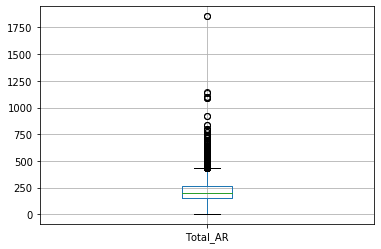

In [65]:
df_sample.boxplot(column='Total_AR')

## Finding and Drop Outlier Total_AR

In [69]:
Q1_Total_AR = df_sample['Total_AR'].quantile(0.25)
Q3_Total_AR = df_sample['Total_AR'].quantile(0.75)
IQR_Total_AR = Q3_Total_AR - Q1_Total_AR

In [89]:
df_outlier = df_sample[['Kontrak','Total_AR']][(df_sample.Total_AR < (Q1_Total_AR  -  1.5 * IQR_Total_AR)) |
                             (df_sample.Total_AR   > (Q3_Total_AR  +  1.5 * IQR_Total_AR))].describe()

In [81]:
# np.delete(df_sample,df_outlier.index,axis=0)
df_sample.drop(index=df_outlier.index,inplace=True)
len(df_sample)

22265

##  Impact  Pendidikan, Segmen, Pekerjaan of Total_AR after drop outlier Total_AR

In [83]:
ols_df_sample = smf.ols('np.log(Total_AR) ~ Pendidikan + Segmen + Pekerjaan_Lainnya + Pekerjaan_Wiraswasta', data=df_sample).fit()
ols_df_sample.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(Total_AR)   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     133.9
Date:                Fri, 25 Oct 2019   Prob (F-statistic):          3.25e-113
Time:                        18:02:33   Log-Likelihood:                -12103.
No. Observations:               22265   AIC:                         2.422e+04
Df Residuals:                   22260   BIC:                         2.426e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.2394      0.006    882.254      0.000       5.228       5.251
Pendidikan              -0.0590      0.006     -9.913      0.000      -0.071      -0.047
Segmen                   0.0193      0.006      3.253      0.001       0.008       0.031
Pekerjaan_Lainnya        0.0195      0.012      1.686      0.092      -0.003       0.042
Pekerjaan_Wiraswasta     0.0953      0.006     15.163      0.000       0.083       0.108
==============================================================================
Omnibus:                     8185.640   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            79407.705
Skew:                          -1.491   Prob(JB):                         0.00
Kurtosis:                      11.758   Cond. No.                         5.83
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-square is not changed, still small:(

***

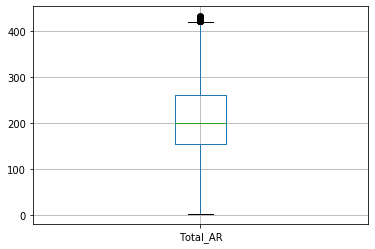

In [90]:
df_sample.boxplot(column='Total_AR')